# Finding the MSD uncertainties from a VASP file

Using ``kinisi`` to obtain the mean-squared displacement and uncertainty in a VASP Xdatcar type file is straightforward and involves using the `DiffusionAnalyzer` class.

In [6]:
import scipp as sc
from pymatgen.io.vasp import Xdatcar
from kinisi.analyze import DiffusionAnalyzer

Below, the `params` dictionary describes some details about our simulation, this are unpacked when passed to the relevant class method. 
You can see other keyword arguments for a given class method in the [relevant documentation](./analyze.html#kinisi.diffusion_analyzer.DiffusionAnalyzer). 
We outline the `params` included in this example below:
- `specie`: the atomic/ionic species to calculate the MSD for
- `time_step`: the simulation timestep in your molecular dynamics simulation, for this example, this XDATCAR is from a VASP *ab-initio* molecular dynamics simulation and the simulation timestep is 2 femtoseconds. Note, that we use the fs unit from the `scipp` library. 
- `step_skip`: the frequency with which the data was written in your simulation trajectory. This XDATCAR contains every 50th molecular dynamics step (`NBLOCK=50` in VASP parlance).
- `progress`: is you want a progress meter to be printed to the screen, this is not necessary for this documentation example. 

In [12]:
params = {'specie': 'Li',
          'time_step': 2.0 * sc.Unit('fs'),
          'step_skip': 50 * sc.Unit('dimensionless'),
          'progress': False
          }

Therefore, for this example, we have a simulation that had a timestep of 2 femtoseconds but we only stored the trajectory information every 50 steps and we want to investigate only the lithium motion. 

The next step is to read the data file in to the appropriate `analyzer`. 
Below, the XDATCAR file is read into a `pymatgen` `Xdatcar` object, called `xd`. 
A `DiffusionAnalyzer` object is then created using the `from_xdatcar` class method, passing also the `params dictionary. 

In [14]:
xd = Xdatcar('./example_XDATCAR.gz')
diff = DiffusionAnalyzer.from_xdatcar(xd, **params)

The `DiffusionAnalyzer will determine the mean-squared displacements and variances (using the variance rescaling approach detailed in the [methodology](./methodology.html)).
The `diff.msd` object is a `scipp.DataArray`, which can be plotted as shown below (this requires the `plopp` library). 

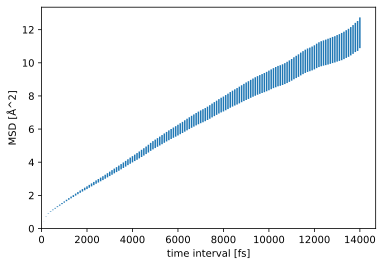

In [17]:
f = diff.msd.plot(marker='')
f.canvas.ylabel = 'MSD ' + f.canvas.ylabel
f.canvas.xmin = 0
f.canvas.ymin = 0
f

If you want to delve deeper into the data, this can be achieved by investigating the `scipp.DataArray` directly. 
This can be interpreted as a HTML object, as shown below. 

In [18]:
diff.msd

<scipp.DataArray>
Dimensions: Sizes[time interval:140, ]
Coordinates:
* dimensionality              int64  [dimensionless]  ()  3
* n_samples                 float64  [dimensionless]  (time interval)  [26880, 13440, ..., 193.381, 192]
* time interval             float64             [fs]  (time interval)  [100, 200, ..., 13900, 14000]
Data:
                            float64           [Å^2]  (time interval)  [0.443029, 0.706556, ..., 11.6202, 11.8137]  [8.9015e-06, 4.63901e-05, ..., 0.813531, 0.860436]

Note that by given the appropriate units to the `time_step` input, the units of the time interval (the duration in which the particle travelled) can be correctly calculated. 